In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [3]:
# upload datasets
df = pd.read_csv('data/fuel_comsumption_raw.csv')
df.head(3).append(df.tail(3))

,Unnamed: 0,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3032,3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,0.0,21048.0,21048.0,0.0,21048.0,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018
3034,3034,12,19393.0,WN,WN,Southwest Airlines Co.,3,173203901.0,0.0,0.0,2440902.0,2440902.0,175644803.0,173448291.0,2440902.0,175889193.0,351339537.0,0.0,0.0,5730304.0,5730304.0,357069841.0,351820604.0,5730304.0,357550908.0,2018


In [4]:
df.shape

(3035, 26)

In [5]:
df.dtypes

Unnamed: 0             int64
month                  int64
airline_id           float64
unique_carrier        object
carrier               object
carrier_name          object
carrier_group_new      int64
sdomt_gallons        float64
satl_gallons         float64
spac_gallons         float64
slat_gallons         float64
sint_gallons         float64
ts_gallons           float64
tdomt_gallons        float64
tint_gallons         float64
total_gallons        float64
sdomt_cost           float64
satl_cost            float64
spac_cost            float64
slat_cost            float64
sint_cost            float64
ts_cost              float64
tdomt_cost           float64
tint_cost            float64
total_cost           float64
year                   int64
dtype: object

In [6]:
# reset dtypes for categorical and time columns that contains int or float as 'str'
cat_col_names = ['airline_id', 'carrier_group_new', 'month', 'year']
df[cat_col_names] = df[cat_col_names].astype('str')

# check dtypes again
df.dtypes

Unnamed: 0             int64
month                 object
airline_id            object
unique_carrier        object
carrier               object
carrier_name          object
carrier_group_new     object
sdomt_gallons        float64
satl_gallons         float64
spac_gallons         float64
slat_gallons         float64
sint_gallons         float64
ts_gallons           float64
tdomt_gallons        float64
tint_gallons         float64
total_gallons        float64
sdomt_cost           float64
satl_cost            float64
spac_cost            float64
slat_cost            float64
sint_cost            float64
ts_cost              float64
tdomt_cost           float64
tint_cost            float64
total_cost           float64
year                  object
dtype: object

In [8]:
def missing_describe(data):
    """
    Returns a pandas dataframe containing information about missing values in columns. 
        PARAMS:
            data (pd.DataFrame): pandas dataframe to look into
        RETURNS:
            missing (): contains number, count, dtype and percentage of missing values in each column    
    """
    # number of missing values in each column
    num_missing = data.isnull().sum()
    # percentage of missing values in each column
    pct_missing = num_missing/data.shape[0]
    # concat info into one dataframe and sorted by num_missing in descending order
    missing = pd.concat([data.dtypes, num_missing, pct_missing], 
                        axis=1,
                        keys = ['dtype', 'missing_count', 'missing_percent']
                       ).sort_values('missing_count', ascending=False)
    return missing

In [9]:
# drop duplicates if there's one
df.drop_duplicates(inplace=True)

# check missing values information
missing_describe(df)

,dtype,missing_count,missing_percent
total_gallons,float64,6,0.001977
tdomt_gallons,float64,3,0.000988
slat_gallons,float64,2,0.000659
slat_cost,float64,1,0.000329
satl_cost,float64,1,0.000329
sint_cost,float64,1,0.000329
tint_gallons,float64,1,0.000329
ts_gallons,float64,1,0.000329
sint_gallons,float64,1,0.000329
spac_gallons,float64,1,0.000329


In [11]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [12]:
df.head()

,Unnamed: 0,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
1,1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
5,5,1,19917.0,5X,5X,United Parcel Service,3,32138000.0,9743000.0,16116000.0,2972000.0,28831000.0,60969000.0,32138000.0,28831000.0,60969000.0,34098000.0,9752000.0,17965000.0,3524000.0,31241000.0,65339000.0,34098000.0,31241000.0,65339000.0,2016


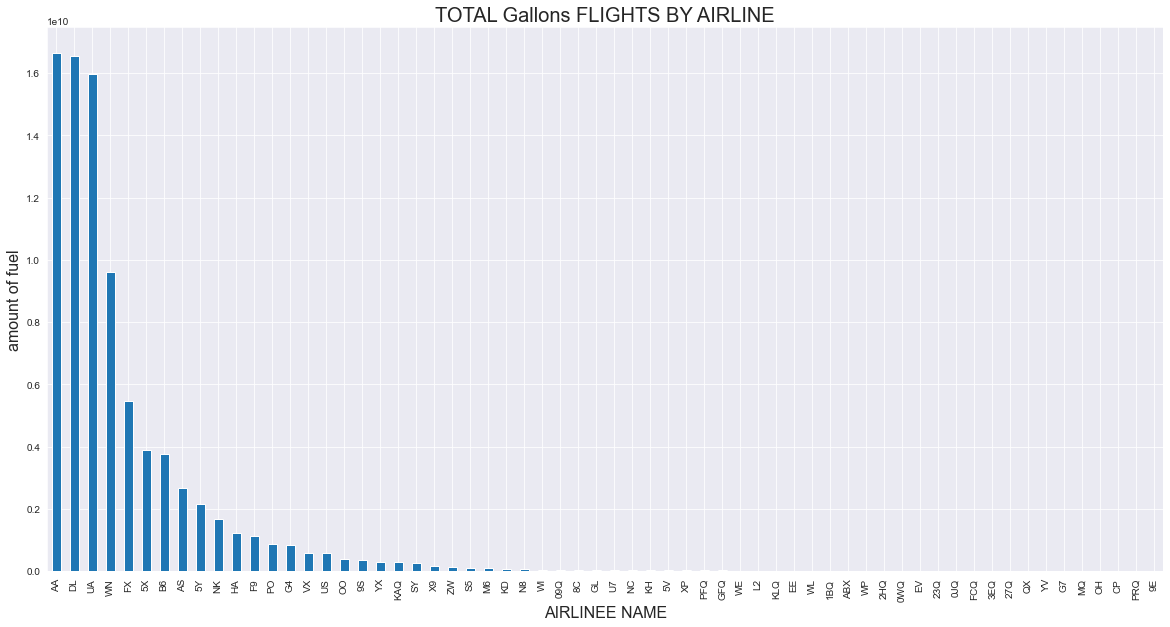

In [14]:
plt.figure(figsize=(20, 10))
df.groupby('unique_carrier').total_gallons.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL Gallons FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE CODE', fontsize=16)
plt.ylabel('amount of fuel', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()